In [1]:
# Import Libraries
import pickle
import matplotlib.pyplot as plt

import econml
import dowhy
from dowhy import CausalModel

In [2]:
df = pickle.load(open("df_causal_inference.p", "rb"))

In [3]:
# Define causal model
model = CausalModel(data = df,
                    treatment = "hasGraduateDegree",
                    outcome = "greaterThan50k",
                    common_causes = "age")

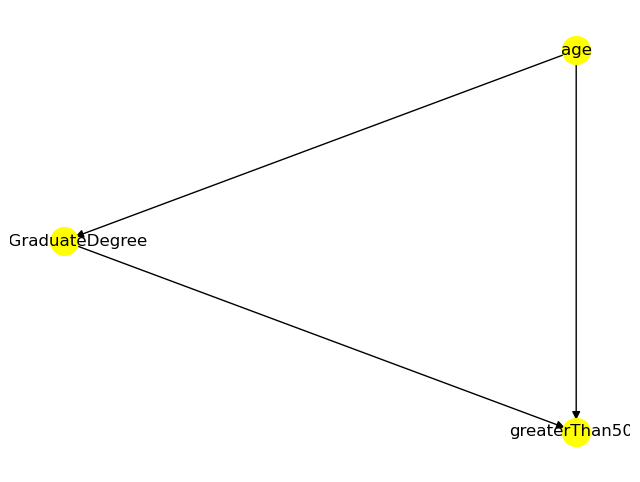

In [5]:
# View the model
model.view_model()

In [6]:
# Generate estimand
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [7]:
# Compute causal effect using metalearner
identified_estimand_experiment = model.identify_effect(proceed_when_unidentifiable=True)

from sklearn.ensemble import RandomForestRegressor

metalearner_estimate = model.estimate_effect(identified_estimand_experiment,
                                             method_name="backdoor.econml.metalearners.TLearner",
                                             confidence_intervals=False,
                                             method_params={
                                                 "init_params":{'models': RandomForestRegressor()},
                                                 "fit_params":{}
                                             })

print(metalearner_estimate)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

## Realized estimand
b: greaterThan50k~hasGraduateDegree+age
Target units: ate

## Estimate
Mean value: 0.20228350354547858
Effect estimates: [[ 0.31268814]
 [ 0.22293312]
 [ 0.35660646]
 ...
 [ 0.18561384]
 [-0.0148522 ]
 [ 0.20002015]]



(array([  74.,  123., 2357., 5906., 2656., 9331., 5643., 2608.,  408.,
          64.]),
 array([-0.29645085, -0.19921299, -0.10197512, -0.00473726,  0.09250061,
         0.18973848,  0.28697634,  0.38421421,  0.48145207,  0.57868994,
         0.67592781]),
 <BarContainer object of 10 artists>)

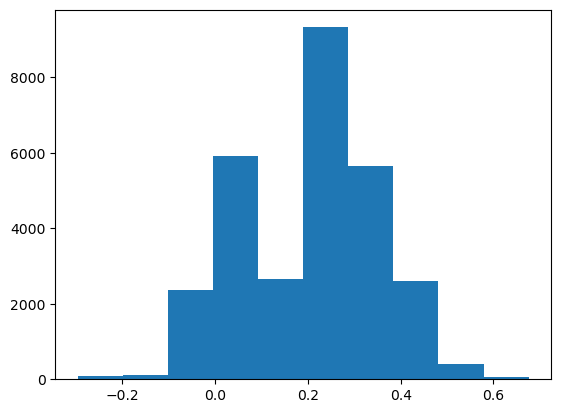

In [8]:
# Print histogram of causal effects
plt.hist(metalearner_estimate.cate_estimates)